# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [81]:
import numpy as np
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    
    n = 0
    x = x0
    
    while n < maxiter and abs(f(x)) > eps or f(x)/fder(x) > eps: #частное это наша разность между иисками
        x -= f(x)/fder(x)
        n += 1
        
    return x, n

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [6]:
f = lambda x: x**2 - 1
fder = lambda x: 2 * x

    
newton_iteration(f, fder, 330)


(1.0000081376594565, 11)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [7]:
def new_newton(f, fder, x0, eps=1e-5, maxiter=1000):
    
    
    a = [] #пихаю в массивы вывод при различных m
    num = []
    
    
    for i in range(5):
        
        n = 0
        x = x0
        
        while n < maxiter and abs(f(x)) > eps and (i + 1) * f(x)/fder(x) > eps:
            
        
            
            x -= (i + 1) * f(x)/fder(x) 
            n += 1
            
        
        a.append(x)
        num.append(n)
        
    return a, num


f = lambda x: (x**2 - 1)**2
fder = lambda x: 4 * x * (x**2 - 1)

ar = new_newton(f, fder, 33)
print(ar[0], "\n", ar[1]) ##вот это скачок за одну итерацию в конце



[1.0011266638957097, 1.000853318370612, 0.8871188968366204, 0.030303030303031164, -8.212121212121211] 
 [21, 7, 3, 1, 1]


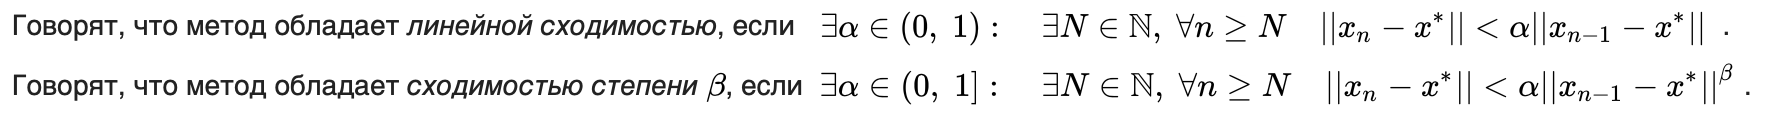

на первом графике все синее и сходится к 1/2 -> линейная сходимость 
 на втором красное и тоже к 1/2, т.е. квадратичная 
 третий сходится линейно к 1/2 
 4 расходится (слишком большие m,ньютон не работает) 
 5 сходится еще медленнее чем линейное(плохо тоже)


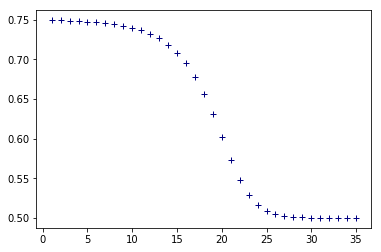

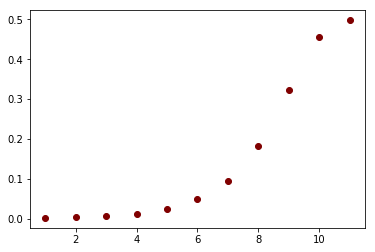

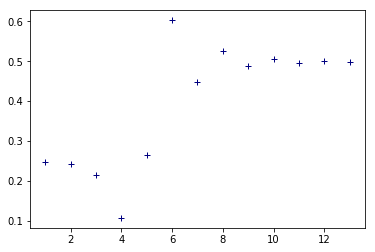

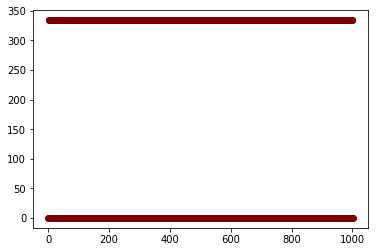

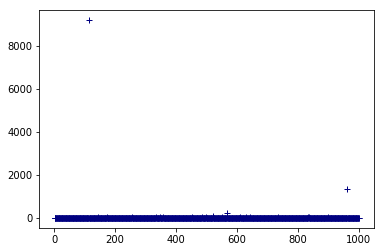

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def new_newton_draw(f, fder, x0, eps=1e-5, maxiter=1000):
    
    
    a = []
    num = []
    l = []
    nn = []
    
    for i in range(5):
        
        n = 0
        x = x0
        plt.figure()
        res = []
        res2 = [] #оказалось, что проще хранть оба массива и выбирать нужный
        its = [] #итерации
       
        while n < maxiter and abs(f(x)) > eps or (i + 1) * f(x)/fder(x)> eps:
            
        
            zn = abs(x - 1)#знаменатель отношения из условия, у нас х0 = 1
            x -= (i + 1) * f(x)/fder(x)
            ch = abs(x - 1) #числитель отношения
            res.append(ch/zn)
            n += 1
            its.append(n)
            res2.append(ch/zn**2)
            
        if ch/zn < 1 and ch/zn > 0.01:   
                        
            plt.plot(its, res, "+", color = 'navy' )
                
        else:
            
            plt.plot(its, res2, "o", color = 'maroon')
            
             
        
        a.append(x)
        num.append(n)
        
    return a, num


ar = new_newton_draw(f, fder, 333)

print ('на первом графике все синее и сходится к 1/2 -> линейная сходимость', '\n', 'на втором красное и тоже к 1/2, т.е. квадратичная', '\n', 'третий сходится линейно к 1/2', '\n', '4 расходится (слишком большие m,ньютон не работает)', '\n','5 сходится еще медленнее чем линейное(плохо тоже)' )

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

<IPython.core.display.Javascript object>


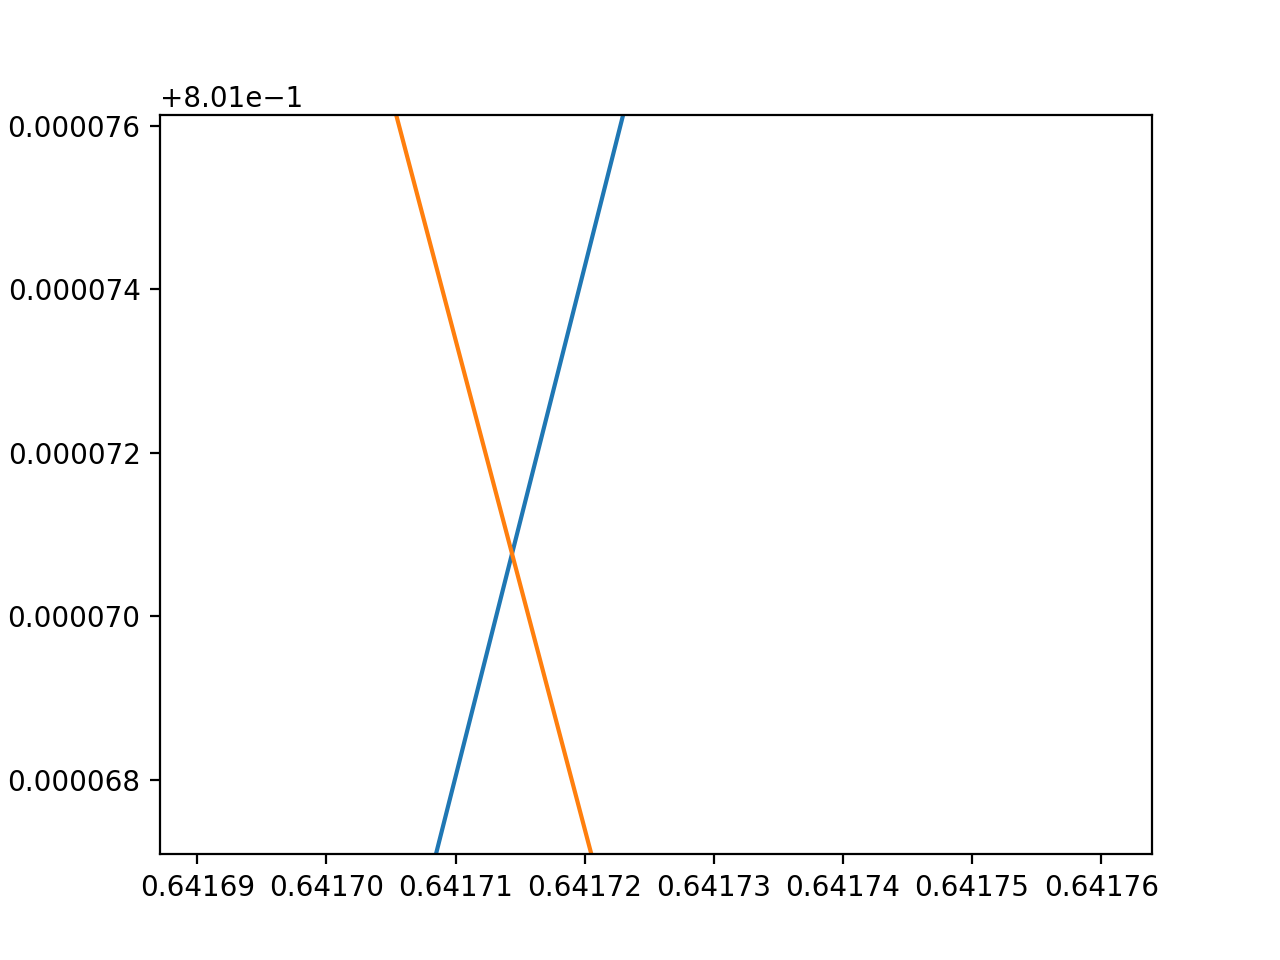

In [154]:

%matplotlib notebook
x = np.arange (-100, 101, 10e-5)
np.shape(x)
plt.plot(x[1005000:], np.sqrt(x[1005000:]))
plt.plot(x, np.cos(x))
plt.show()

#seems like it's approximately 0.64171?..


In [11]:
%matplotlib inline
def f(x):
    f = np.sqrt(x) - np.cos(x)
    return f

def fder(x):
    fder = 1/(2*np.sqrt(x)) + np.sin(x)
    return fder

newton_iteration(f, fder, 303)


(286.0168715846853, 1)

In [20]:
def newton_iteration_nodiff(f, fder, x0, alpha, eps=1e-5, maxiter=1000):
    
    n = 0
    x = x0
    
    while n < maxiter and abs(f(x)) > eps and x > alpha * f(x):
        x -= alpha * f(x)
        n += 1
    return x, n

for alpha in range (-10,11):
    print(alpha, newton_iteration_nodiff(f, fder, 20273, alpha))
    
    
print('\n','diff(0,642...) is approximately 1.4, so expected alpha should be about 2/(1,3 + 1,5) [bc there should be no abs(diff) in the formula, according to the lecture (but if it is in case that my func is - my func, ok)], which is about 0.7. So alpha_exp should be about 0.7 and that is supported by our results: -1, which the closest number to 0.7, gives us the best reselt with 9 its')

-10 (26353703.931838725, 1000)
-9 (21477789.408364683, 1000)
-8 (17103951.286627404, 1000)
-7 (13226196.622852841, 1000)
-6 (9845371.568164313, 1000)
-5 (6964271.7257795585, 1000)
-4 (4579027.45089643, 1000)
-3 (2692485.8846427216, 1000)
-2 (1301733.491382629, 1000)
-1 (411977.0897441538, 1000)
0 (20273.0, 1000)
1 (0.6417204385115813, 286)
2 (2.0395506411828155, 138)
3 (1.2874060595495465, 93)
4 (10.036296060619804, 68)
5 (11.300689282522953, 54)
6 (3.7788136053903614, 45)
7 (23.04820381632298, 38)
8 (1.7736239284197914, 34)
9 (12.501487958295442, 29)
10 (2.0434929434693316, 26)

 diff(0,642...) is approximately 1.4, so expected alpha should be about 2/(1,3 + 1,5) [bc there should be no abs(diff) in the formula, according to the lecture (but if it is in case that my func is - my func, ok)], which is about 0.7. So alpha_exp should be about 0.7 and that is supported by our results: -1, which the closest number to 0.7, gives us the best reselt with 9 its


In [19]:
print('now we can see that some alphas give us the same result with less iterations', '\n')

for alpha in range (-10, 11):
    print((alpha)/10, newton_iteration_nodiff(f, fder, 20273, (alpha)/10))

now we can see that some alphas give us the same result with less iterations 

-1.0 (411977.0897441538, 1000)
-0.9 (350533.13278160844, 1000)
-0.8 (293900.21832991857, 1000)
-0.7 (242183.3018585632, 1000)
-0.6 (195527.36762770193, 1000)
-0.5 (153858.64194266222, 1000)
-0.4 (117159.05714342272, 1000)
-0.3 (85450.75954672713, 1000)
-0.2 (58735.33991109333, 1000)
-0.1 (37012.52126245743, 1000)
0.0 (20273.0, 1000)
0.1 (8530.827188806075, 1000)
0.2 (1788.5406338557545, 1000)
0.3 (0.6417196596241106, 965)
0.4 (0.6417206644524538, 720)
0.5 (0.6417202531401764, 574)
0.6 (0.6417179421340041, 477)
0.7 (0.6417171013401142, 406)
0.8 (0.6417135332058378, 354)
0.9 (0.6417155404872075, 317)
1.0 (0.6417204385115813, 286)


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

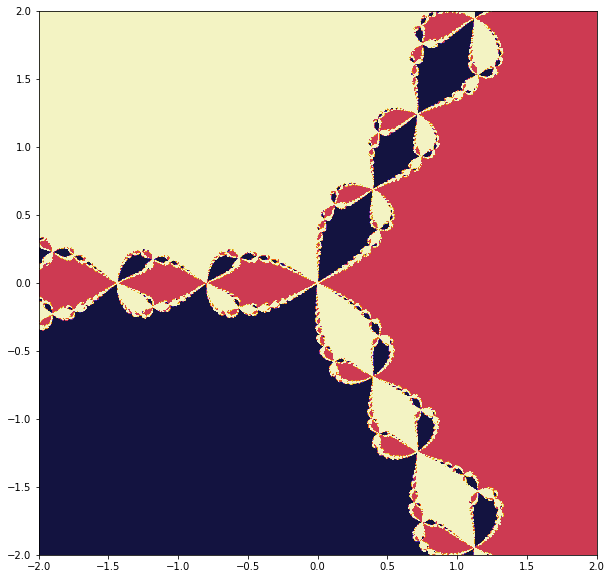

[ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]


In [153]:
from matplotlib import cm

func = lambda x: x**3 - 1
dfunc = lambda x: 3*x**2


roots=np.exp(np.arange(0,3)*2*np.pi*1j/3)
initialReal=np.linspace(-2,2,1000)
initialImag=np.linspace(-2,2,1000)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR+1j*YR
results=np.zeros_like(initial,dtype='float64')

for i in range (np.shape(results)[0]):
    for j in range (np.shape(results)[1]):
        
        results[i,j] = round(newton_iteration(func, dfunc,initial[i,j])[0].imag) #bc Im is 0 and +- 0.85, that's pretty simple
        
        
    
plt.figure(figsize = (10,10))
h = plt.contourf(XR, YR, results, cmap=cm.CMRmap)

plt.show()
print(roots)